# Визуализация данных

Подключаем пакет для работы с графиками:

In [2]:
import matplotlib.pyplot as plt

Подключаем пакет для работы с таблицами:

In [3]:
import pandas as pd

Считываем табличные данные по ссылке:

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mikewellmeansme/biological-statistics-course/master/data/001.csv')

Смотрим на данные:

In [5]:
df.head()

,ШГК,№,D1,CWT1,D2,CWT2,D3,CWT3,D4,CWT4,D5,CWT5
0,736.48,1,60.94,3.41,48.31,3.00,47.41,2.59,45.16,2.98,56.27,3.20
1,736.48,2,46.25,2.88,49.87,2.76,43.09,2.37,57.10,2.98,54.02,3.10
2,736.48,3,43.97,2.60,40.03,2.47,41.99,2.46,45.41,2.68,52.01,2.91
3,736.48,4,43.79,2.72,37.90,2.58,48.53,3.11,45.44,2.47,46.50,3.00
4,736.48,5,46.49,2.37,35.87,2.63,47.12,3.11,46.95,2.56,35.02,2.74


Напоминаем, откуда мы взяли данные:

![cells](images/cells_with_rows.png)

Мы взяли пять рядов клеток из снимка годичного кольца, в каждом из них для каждой клетки измерили диаметр D (зелёным) и толщину клеточной стенки CWT (красным), и записали в таблицу:

Диаметры первого ряда в колонку D1, Толщины клеточных стенок первого ряда в колонку CWT1 и так далее.

(если смотреть внимательно, то на рисунке измеряется двойная толщина клеточной стенки. В данных это учтено и записана только одинарная)

# Простые графики: Ломанные линии

Строим график зависимости диаметра клеток первого ряда (D1) от их номера (№):

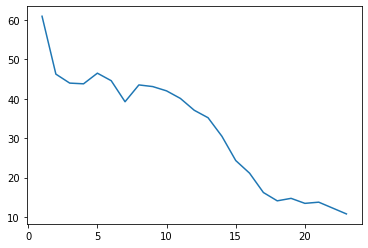

In [7]:
plt.plot(df['№'], df['D1'])  # Функция plt.plot(x, y) строит ломанную линию по двум спискам одинаковой длины,
                             # в первом списке перечислены координаты точек по X, а во втором - по Y 
plt.show()                   # Функция plt.show() выводит график на экран

Добавим на график легенду:

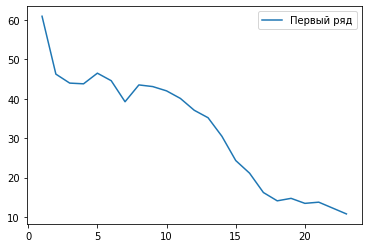

In [8]:
plt.plot(df['№'], df['D1'], label='Первый ряд')
plt.legend()               # функция plt.legend() отображает легенды для всех линий, если у них был прописан параметр label
plt.show()

Добавим название осей X и Y:

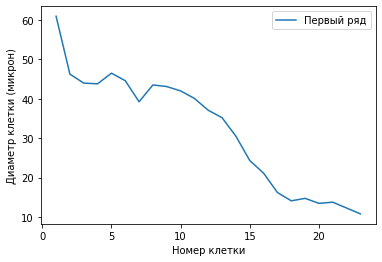

In [9]:
plt.plot(df['№'], df['D1'], label='Первый ряд')
plt.xlabel('Номер клетки')             # Функция plt.xlabel() задаёт название по оси X
plt.ylabel('Диаметр клетки (микрон)')  # Функция plt.ylabel() задаёт название по оси Y
plt.legend()
plt.show()

Добавим заголовок:

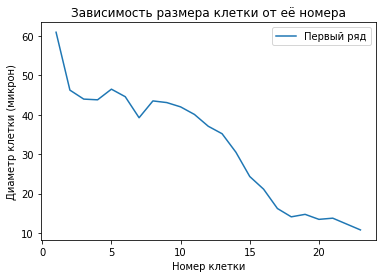

In [10]:
plt.plot(df['№'], df['D1'], label='Первый ряд')
plt.xlabel('Номер клетки')
plt.ylabel('Диаметр клетки (микрон)')
plt.title('Зависимость размера клетки от её номера') # функция plt.title() нужна для добавления заголовка на полотно 
plt.legend()
plt.show()

Мы можем настраивать различные параметры отрисовки линии:

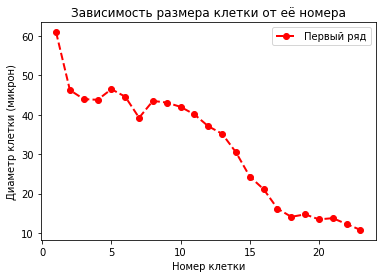

In [11]:
plt.plot(
    df['№'],             # Значения точек по оси X
    df['D1'],            # Значения точек по оси Y
    label='Первый ряд',  # Название линии, отображаемое в легенде
    color='red',         # Цвет линии
    marker='o',          # Тип маркеров, которыми помечаются точки на линии
    linestyle='--',      # Стиль линии
    linewidth='2'        # Толщина линии
)
plt.xlabel('Номер клетки')
plt.ylabel('Диаметр клетки (микрон)')
plt.title('Зависимость размера клетки от её номера')
plt.legend()
plt.show()

Доступные цвета можно посмотреть здесь: https://matplotlib.org/stable/gallery/color/named_colors.html

Типы линий можно посмотреть здесь: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html или здесь: https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html

Типы маркеров можно посмотреть здесь: https://matplotlib.org/stable/api/markers_api.html

Постройте график, поменяя в нём цвет, стиль линии, маркеры или ширину линии

Используя цикл, мы можем построитиь несколько графиков на одном полотне:

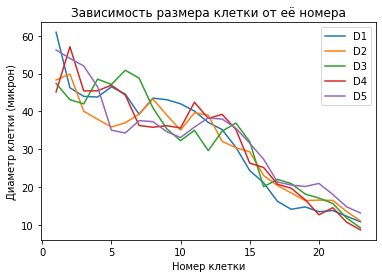

In [14]:
for column in ['D1', 'D2', 'D3', 'D4', 'D5']:
    plt.plot(df['№'], df[column], label=column)

plt.xlabel('Номер клетки')
plt.ylabel('Диаметр клетки (микрон)')
plt.title('Зависимость размера клетки от её номера')
plt.legend()
plt.show()

Линии, строющиеся на одном полотне автоматически окрашиваются в разный цвет

Добавим среднюю линию на график и трубу стандартного отклонения:

Сначала вычислим средние диаметры клеток по всем рядам, и стандартные отклонения диаметров от среднего по всем рядам:

In [15]:
df['Dmean'] = df[['D1', 'D2', 'D3', 'D4', 'D5']].mean(axis=1)
df['Dstd'] = df[['D1', 'D2', 'D3', 'D4', 'D5']].std(axis=1)

Теперь на нашем графике нарисуем жирной чёрной линией средний диаметр для каждой клетки, а вокруг него "трубу" стандартного отклонения:

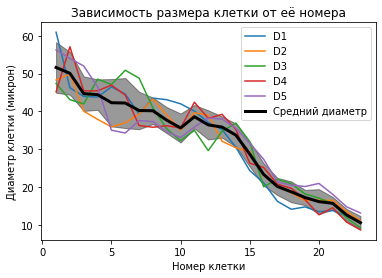

In [24]:
for column in ['D1', 'D2', 'D3', 'D4', 'D5']:
    plt.plot(df['№'], df[column], label=column)

# Строим среднюю линию
plt.plot(
    df['№'],                # Значения по X
    df['Dmean'],            # Значения по Y
    color='black',          # Цвет линии - Чёрный
    linewidth='3',          # Толщина линии равна 3
    label='Средний диаметр'
)

# Строим трубу стандартного отклонения
plt.fill_between(
    df['№'],                # Значения по X
    df['Dmean']-df['Dstd'], # Значения по Y для нижней границы трубы - среднее значение минус стандартное отклонение в точке
    df['Dmean']+df['Dstd'], # Значения по Y для верхней границы трубы - среднее значение плюс стандартное отклонение в точке
    color='black',          # Цвет заполнения - чёрный
    alpha=0.4               # Непрозрачность заполнения составит 40%
)

plt.xlabel('Номер клетки')
plt.ylabel('Диаметр клетки (микрон)')
plt.title('Зависимость размера клетки от её номера') 
plt.legend()
plt.show()

Мы видим, что большинство наших индивидуальных линий попадают в трубу стандартного отклонения

Всё то же самое мы можем проделать и для CWT:

In [ ]:
df['CWTmean'] = df[['CWT1', 'CWT2', 'CWT3', 'CWT4', 'CWT5']].mean(axis=1)
df['CWTstd'] = df[['CWT1', 'CWT2', 'CWT3', 'CWT4', 'CWT5']].std(axis=1)

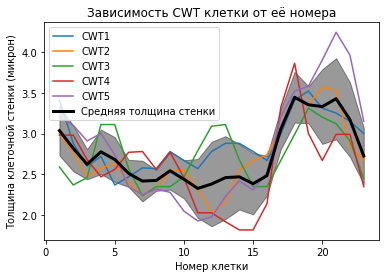

In [26]:
for column in ['CWT1', 'CWT2', 'CWT3', 'CWT4', 'CWT5']:
    plt.plot(df['№'], df[column], label=column)

plt.plot(
    df['№'],
    df['CWTmean'],
    color='black',
    linewidth='3',
    label='Средняя толщина стенки'
)

plt.fill_between(
    df['№'],
    df['CWTmean']-df['CWTstd'], 
    df['CWTmean']+df['CWTstd'], 
    color='black',
    alpha=0.4 
)

plt.xlabel('Номер клетки')
plt.ylabel('Толщина клеточной стенки (микрон)')
plt.title('Зависимость CWT клетки от её номера') 
plt.legend()
plt.show()

# Диаграммы рассеяния

Мы рассмотрели самый простой способ отрисовки данных - ломаная линия, соединяющая точки. Однако иногда нам может понадобиться нанести на график только точки.

Такой вид графиков называется "scatterplot" или "Диаграмма рассеяния" и строится в matplotlib следующим образом:

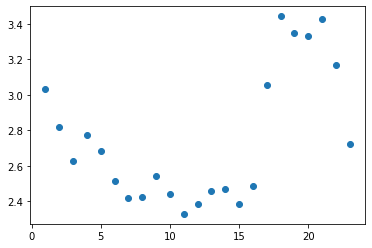

In [27]:
plt.scatter(df['№'], df['CWTmean'])
plt.show()

Как мы видим, на график нанеслись только точки, без линий.

Диаграммы рассеяния, как и простые графики, мы также можем визуально настраивать:

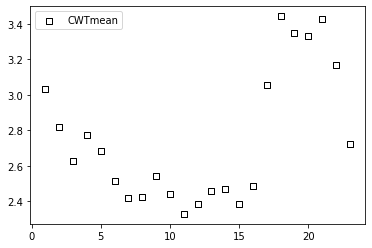

In [33]:
plt.scatter(
    df['№'],             # Значения точек по оси X
    df['CWTmean'],       # Значения точек по оси Y
    color='white',       # Цвет заполнения точек
    edgecolors='black',  # Цвет краёв точек
    marker='s',          # Форма точек
    label='CWTmean'      # Имя графика
)
plt.legend()
plt.show()

Мы также можем строить на одном полотне и ломаные линии и диаграмы рассеяния:

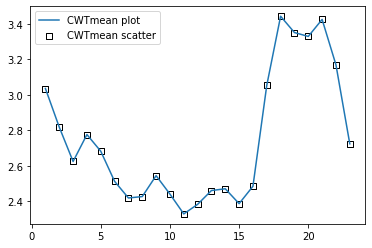

In [37]:
plt.plot(
    df['№'],           
    df['CWTmean'],
    label='CWTmean plot'
)

plt.scatter(
    df['№'],
    df['CWTmean'],
    color='white',
    edgecolors='black', 
    marker='s',
    label='CWTmean scatter'
)

plt.legend()
plt.show()

Однако по-умолчанию диаграммы рассеяния строятся за ломанными линиями, чтобы изменить это, нужно изменить порядок отрисовки графиков (zorder):

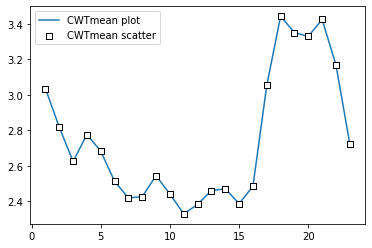

In [38]:
plt.plot(
    df['№'],           
    df['CWTmean'],
    label='CWTmean plot',
    zorder=1               # Теперь сначала отрисуется ломаная
)

plt.scatter(
    df['№'],
    df['CWTmean'],
    color='white',
    edgecolors='black', 
    marker='s',
    label='CWTmean scatter',
    zorder=2               # И только потом диаграмма рассеяния
)

plt.legend()
plt.show()

# Столбчатые диаграммы

Помимо ломанных и диаграмм рассеяния, одним из базовых способов визуализации данных являются столбчатые диаграммы (Bar plot):

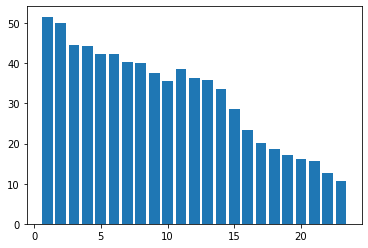

In [42]:
plt.bar(
    df['№'],
    df['Dmean']
)
plt.show()

Мы также можем строить несколько столбчатых диаграмм на одном полотне, и кастомизировать их:

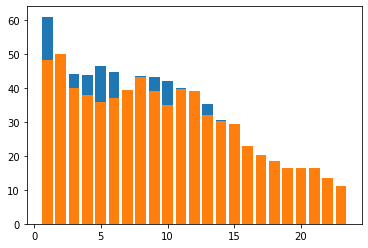

In [44]:
plt.bar(
    df['№'],
    df['D1']
)
plt.bar(
    df['№'],
    df['D2']
)
plt.show()

Однако данный график менее ифнормативен, так как данные перекрывают друг друга.

Работая с таблицами, мы можем построить столбчатую диаграмму методом самой таблицы:

<AxesSubplot:>

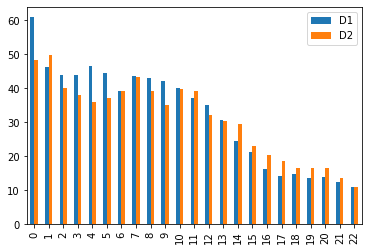

In [50]:
df[['D1', 'D2']].plot(kind='bar')

Однако даже так информативность такого графика куда ниже, чем у ломанной или диаграммы рассеяния. Обычно столбчатые диаграммы используют для показания разниц приростов - в дендроклиматологии чаще всего осадки рисуют столбчатыми диаграммами, а температуру - ломанной.

# Чуть менее наивный подход к графикам

Ранее по саминару мы работали только с функциями построения графиков. Их быстро и просто использовать, однако их функционал слегка урезан, относительно работы с объектами фигуры и осей.

В частности, используя функции, сложновато будет построить два графика на одном полотне, но на разных осях.

Для того, чтобы это сделать, лучше прибегнуть к созданию фигуры (полотна) и осей, а затем к созданию вторичной оси:

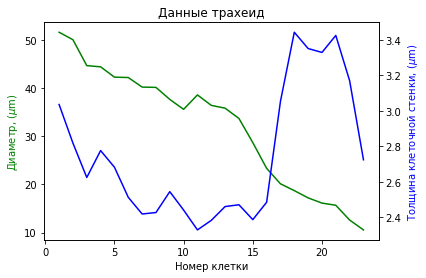

In [58]:
fig, ax1 = plt.subplots()                         # Создаём полотно под именем fig с осями ax1

ax2 = ax1.twinx()                                 # Создаём оси ax2, которая будет являться побочной для осей ax1
ax1.plot(df['№'], df['Dmean'], 'g')               # Строим на осей ax1 данные по диаметру
ax2.plot(df['№'], df['CWTmean'], 'b')             # Строим на осей ax2 данные по клеточной стенке


ax1.set_title('Данные трахеид')                   # Устанавливаем заголовок
ax1.set_xlabel('Номер клетки')                    # Устанавливаем имя оси X осей ax1
ax1.set_ylabel('Диаметр, ($\mu$m)', color='g')    # Устанавливаем имя оси Y осей ax1
ax2.set_ylabel('Толщина клеточной стенки, ($\mu$m)', color='b') #Устанавливаем имя оси Y осей ax2

plt.show()


Заметьте, методы установки имён осей и заголовка отличаются от того, что мы писали ранее наличием префикса "set_". Это объясняется тем, что ранее мы работали с функциями, которые оперировали стандартными объектами фигуры и осей, которые создавались без нашего ведома, а теперь - с конкретными объектами осей.

Кроме того, в названиях осей мы использовали формулы из языка форматирования текста $\LaTeX$ - для их использования, опишите желаемую формулу между знаков доллара, matplotlib сам преобразует её в красивый вид:

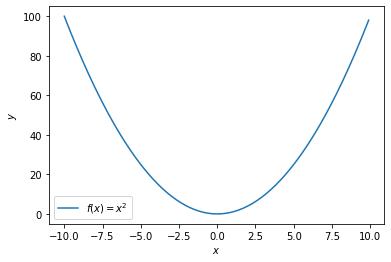

In [67]:
import numpy as np

x = np.arange(-10, 10, 0.1)

plt.plot(x, x**2, label='$f(x)=x^2$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()